

# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

<ul>
    <li>‘ScheduledDay’ tells us on what day the patient set up their appointment.</li>
    <li>‘Neighborhood’ indicates the location of the hospital.</li>
    <li>‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.</li>
</ul>    




### Question(s) for Analysis
What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [75]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling




### General Properties


In [86]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshow.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [77]:
# Generate descriptive statistics for the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


If we look at the age we can find the following:
<ul>
    <li>The average age is 37</li>
    <li>The min age is -1 and here it's not possible so we will work on that</li>
</ul>    

In [78]:
# show information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


We can see there's no missing data which is good

In [79]:
# show the number of rows and columns
df.shape

(110527, 14)

we have 110527 rows and 14 columns

In [80]:
# check for the number of duplicated rows
df.duplicated().sum()

0

We have 0 duplicated rows so we won't need to delete any


### Data Cleaning
Removing and renaming some of the data to make it more easy to work with

In [91]:
# Check for the patient with age as -1
df.loc[df['Age'] == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [90]:
df.drop(df[(df['Age'] == -1)].index, inplace=True)

In [40]:
# replace the -1 with the mean so it makes more sense
df.loc[99832, "Age"] = 37

In [10]:
# Rename the misspelled column name Hipertension
df.rename({"Hipertension": "Hypertension"}, axis=1, inplace= True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [11]:
# Rename the misspelled column name Handcap
df.rename({"Handcap": "Handicap"}, axis=1, inplace= True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [12]:
# replace the - in No-show with a _
df.rename({"No-show": "No_show"}, axis=1, inplace= True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [13]:
# drop the unnecessary columns
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], axis=1, inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

We will take a look at sone analysis using data visuals



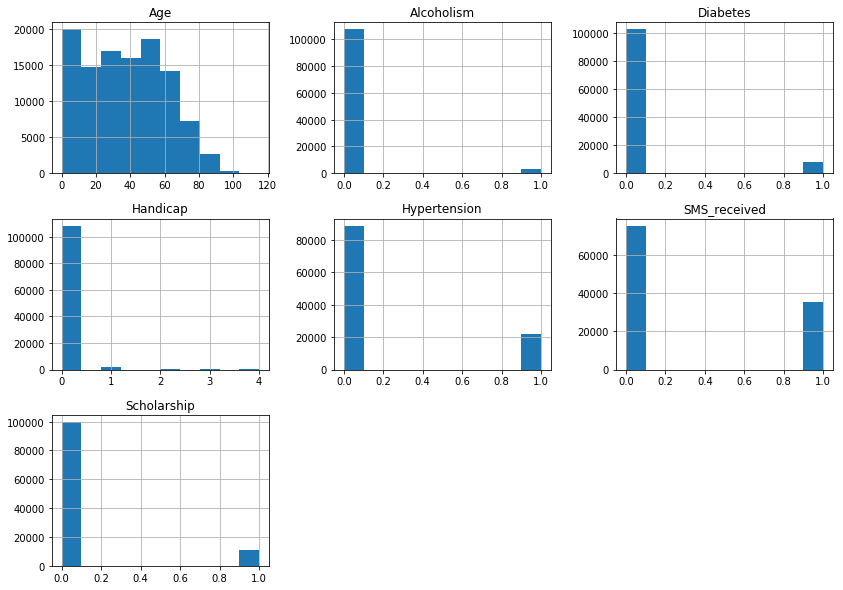

In [14]:
# showing the histograms of the dataset
df.hist(figsize= (14,10));

Based on these plots we can almost see that some factors don't affect people not showing, such as Handicap, Alchoholism, diabetes and Scholarship.<br>
Also we can see that receiving an sms isn't a factor too.

In [15]:
# Creating 2 groups of the patients according to show or no show
show = df.No_show == 'No'
no_show = df.No_show == 'Yes'

In [16]:
df[show].head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [17]:
# show the number of people who showed
df[show].No_show.count()

88208

In [18]:
# show the number of people who didn't show
df[no_show].No_show.count()

22319

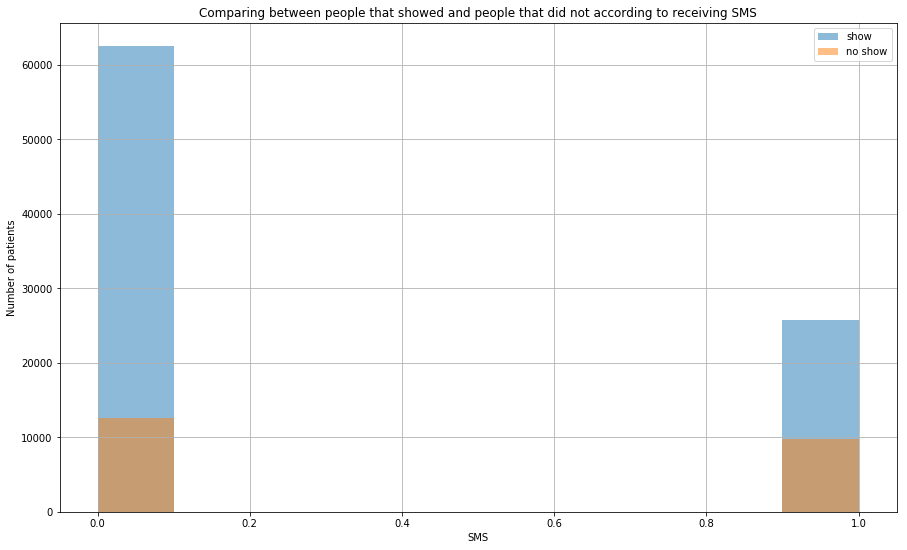

In [19]:
# check if the SMS is affecting the people to show or not
plt.figure(figsize=(15,9))
df.SMS_received[show].hist(alpha=0.5, label='show')
df.SMS_received[no_show].hist(alpha=0.5, label='no show')
plt.legend()
plt.title('Comparing between people that showed and people that did not according to receiving SMS')
plt.xlabel('SMS')
plt.ylabel('Number of patients');

Here it's insignificant to rely on SMS receiving to check if it's affecting the showing of patients as many people who didn't receive also showed 

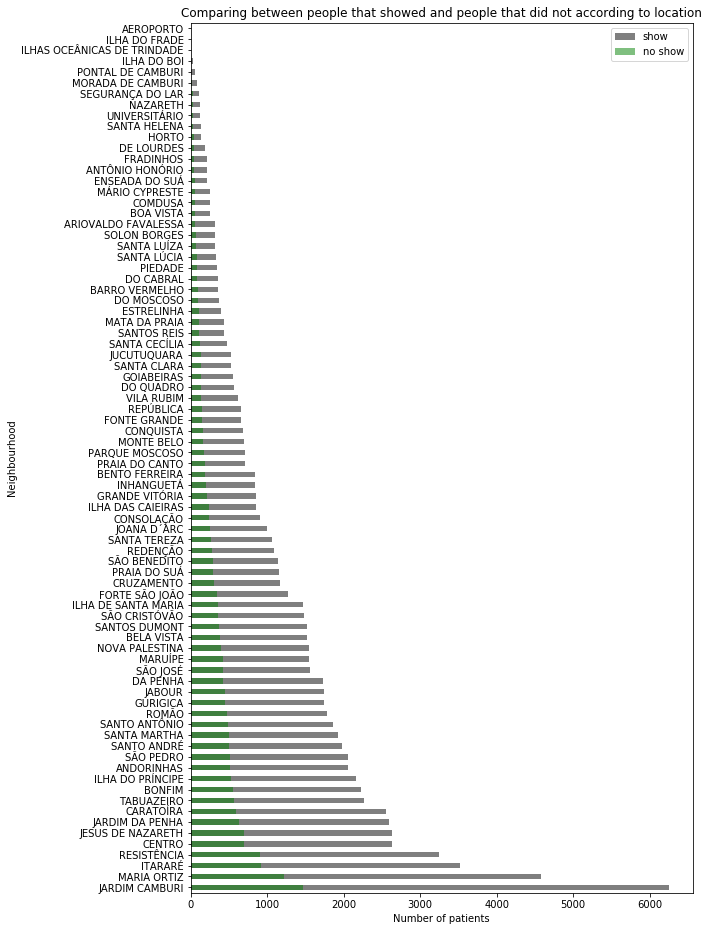

In [20]:
# check if the location is affecting the people to show or not
plt.figure(figsize=(9,16))
df.Neighbourhood[show].value_counts().plot(kind='barh', alpha=0.5, color='black', label='show')
df.Neighbourhood[no_show].value_counts().plot(kind='barh', alpha=0.5, color='green', label='no show')
plt.legend()
plt.title('Comparing between people that showed and people that did not according to location')
plt.ylabel('Neighbourhood')
plt.xlabel('Number of patients');

We can see here that relying on location is almost the best way to see that it's affecting the patients to show or not 

In [21]:
# Create 2 groups of males and females based on showing
male = (df.Gender == 'M') & (show)
female = (df.Gender == 'F') & (show)

In [22]:
# number of males showing
df[male].No_show.count()

30962

In [23]:
# number of females showing
df[female].No_show.count()

57246

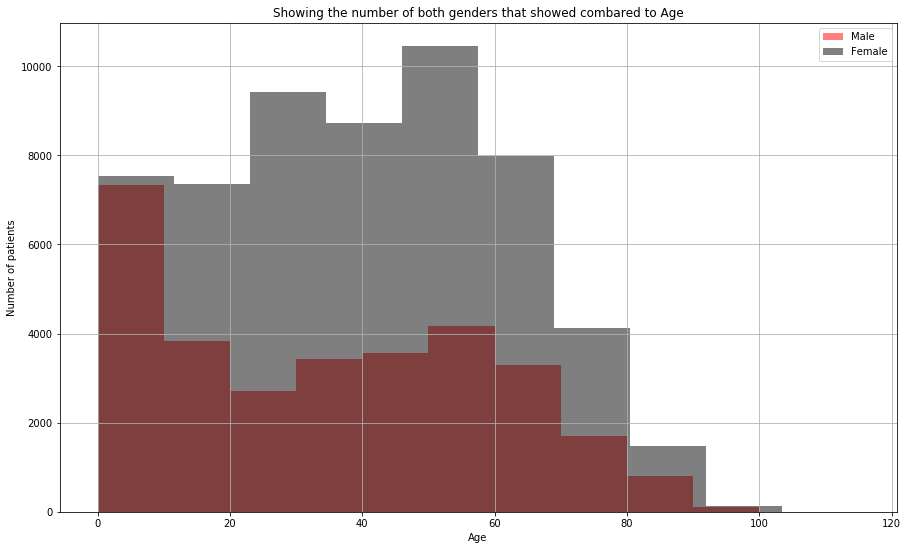

In [24]:
# Creating a graph for males and females showing combared to age
plt.figure(figsize=(15,9))
df.Age[male].hist(alpha=0.5, color='red', label='Male')
df.Age[female].hist(alpha=0.5, color='black', label='Female')
plt.legend()
plt.title('Showing the number of both genders that showed combared to Age')
plt.xlabel('Age')
plt.ylabel('Number of patients');

In [25]:
# Create 2 groups of males and females based on not showing
male_no = (df.Gender == 'M') & (no_show)
female_no = (df.Gender == 'F') & (no_show)

In [26]:
# number of males not showing
df[male_no].No_show.count()

7725

In [27]:
# number of females not showing
df[female_no].No_show.count()

14594

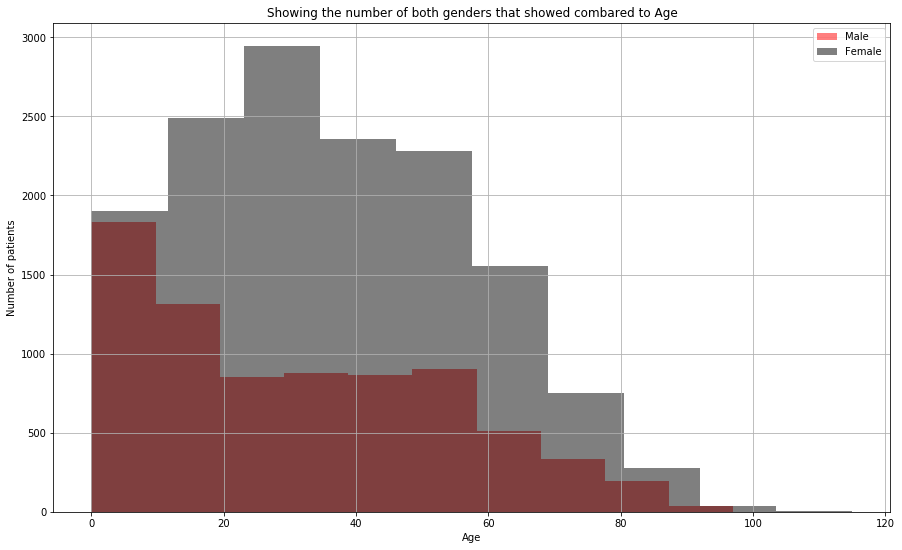

In [28]:
# Creating a graph for males and females not showing combared to age
plt.figure(figsize=(15,9))
df.Age[male_no].hist(alpha=0.5, color='red', label='Male')
df.Age[female_no].hist(alpha=0.5, color='black', label='Female')
plt.legend()
plt.title('Showing the number of both genders that showed combared to Age')
plt.xlabel('Age')
plt.ylabel('Number of patients');

Based on the 2 graphs above we find that it's insignificant to determine the show or no show based on gender's age. <br>
as 80% of both genders showes and 20% didn't show so it's almost identical

In [29]:
# Using a function to call some plots without having to recode the whole thing everytime
def plot_something(df, ax=None, **kwargs):
    ax = ax or plt.gca()
   
    return ax.hist(df, **kwargs)

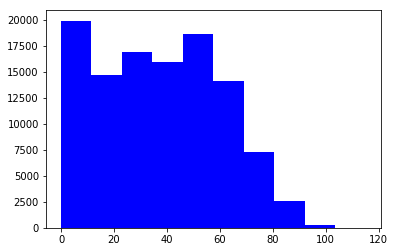

In [30]:
# Calling a plot for the Age range for the patients
fig, ax1 = plt.subplots(1)
plot_something(df.Age, ax1, color='blue');

This graph shows the number of patients for each age

<a id='conclusions'></a>
## Conclusions
<ul>
<li> As the analysis done above we can reach that the strongest factor for deciding the show or no show was the Neighbuorhood
<li> People showing without receiving an sms was strange so it wasn't a strong factor to bas our reasons on
</ul>

### Limitations
Some factors were undeciding in our analysis for the no show such as Gender, Diabetes, Handicap

## Submitting Project 



In [31]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0